## Problem Statement:
To See we you can find any other trends in heart data to predict certain cardiovascular events or find any clear indications of heart health.

### Dataset reference:
https://www.kaggle.com/ronitf/heart-disease-uci

### Attributes 
age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)


In [1]:
# import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
#read dataset


#ds = pd.read_csv('D:/Datasets/HeartDiseaseUCI/heart-disease-uci/heart.csv')
#ds.head()

# File Paths
file = "D:/Datasets/HeartDiseaseUCI/heart-disease-uci/heart.csv"
#OUTPUT_PATH = "../inputs/breast-cancer-wisconsin.csv"

def Read_csv_to_DF(INPUT_PATH): 
    # Load the dataset into Pandas data frame
    DS = pd.read_csv(INPUT_PATH)
    print('Data loaded to DS')
    return DS

DS = Read_csv_to_DF(file)


Data loaded to DS


In [3]:
DS.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
DS.shape

(303, 14)

In [5]:
DS.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
def explore_target(target_col):
    print('check if there is a class imbalance')
    print(target_col.value_counts())
    
explore_target(DS['target'])
          

check if there is a class imbalance
1    165
0    138
Name: target, dtype: int64


In [7]:
explore_target(DS['sex'])

check if there is a class imbalance
1    207
0     96
Name: sex, dtype: int64


In [8]:
def check_nvl(dataset):
    print('check for null values')
    print(dataset.isnull().sum()/len(dataset))

check_nvl(DS)

check for null values
age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E805FB6198>,
      dtype=object)

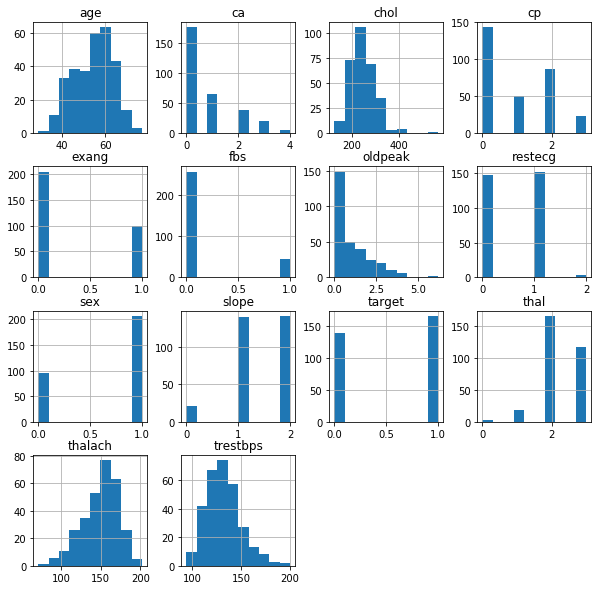

In [9]:
DS.hist(figsize=(10,10))

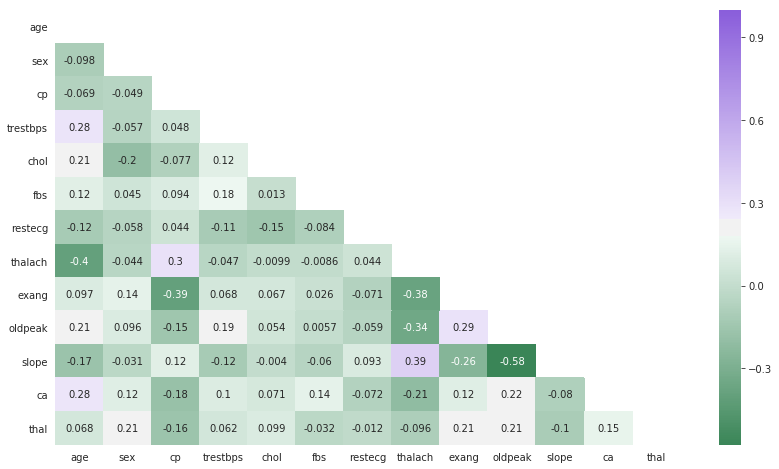

In [10]:
def heatmap(dataset, targetfeature):
    corr_df = dataset.copy()
    drop = targetfeature
    corr_df = corr_df.drop(drop,axis =1)
    corr = corr_df.corr()
    mask = np.zeros_like(corr,dtype= np.bool)
    mask[np.triu_indices_from(mask)]= True
    cmap =  sns.diverging_palette(500,996, as_cmap=True)
    plt.figure(figsize=(14, 8))
    with sns.axes_style("white"):
        sns.heatmap(corr,mask = mask, cmap=cmap, annot= True)

heatmap (DS,['target'])


Not much of a correlation identified - lets proceed
Choletrol seems to be left skwed


## Split Train/Test

In [11]:
X= DS.drop('target',axis=1)
y=DS['target']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

## Data Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

C:\Users\mvaithianathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mvaithianathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Model Training

In [14]:
from sklearn.ensemble import RandomForestClassifier
train_model  = RandomForestClassifier( max_depth=5, min_samples_split=2
                                      , min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                      max_features='auto', max_leaf_nodes=2, min_impurity_decrease=0.0,
                                      min_impurity_split=None, bootstrap=True, oob_score=True
                                      , n_jobs=None, random_state=42, verbose=0, warm_start=False, class_weight=None)



In [15]:
train_model.fit(X_train_scaled,y_train)

C:\Users\mvaithianathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=2,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [16]:
print(train_model.oob_score_)

0.7216981132075472


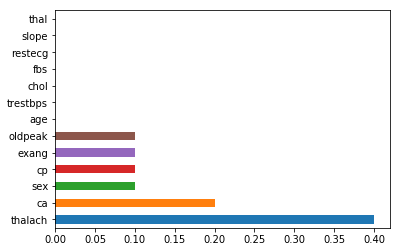

In [17]:
(pd.Series(train_model.feature_importances_, index= X.columns).nlargest(50).plot(kind = 'barh'))

## Check model prediction

In [18]:
X_test_scaled = scaler.transform(X_test)

C:\Users\mvaithianathan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [19]:
Y_predit = train_model.predict(X_test_scaled)


In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('Train accuracy : '+ str (accuracy_score(y_train, train_model.predict(X_train_scaled))))
print('Test accuracy : '+ str (accuracy_score(y_test, Y_predit)))

Train accuracy : 0.7688679245283019
Test accuracy : 0.7802197802197802


### Confusion Matrix

In [21]:
confusion_matrix = confusion_matrix(y_test, Y_predit)
print(confusion_matrix)

[[28 13]
 [ 7 43]]


In [22]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8
Specificity :  0.7678571428571429


### ROC curve

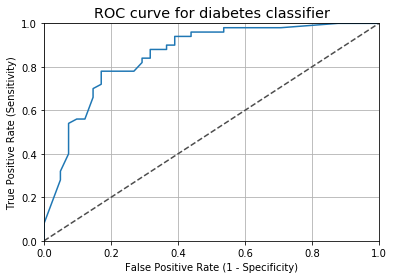

In [23]:
from sklearn.metrics import roc_curve, auc

Y_predicted_Prob = train_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predicted_Prob)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [24]:
auc(fpr, tpr)

0.855609756097561